# Modeling 1D

SimPEG has been slowly included into mtpy. The most basic inversion is 1D.  Here, a few different methods for inverting data in 1D are presented.  

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

from mtpy import MTCollection

In [3]:
from mtpy import MTCollection
mc = MTCollection()
mc.open_collection(Path(r"c:\Users\jpeacock\OneDrive - DOI\SAGE\2024\EDI_Files\SAGE_tf_all.h5"))
#mc.open_collection(Path(r"../../../scratch/nm05/jp0633/musgraves_edis/musgraves_tf.h5"))

from ipywidgets import widgets, interact
station_names = mc.dataframe.station.values
def foo(name, component):
    tf = mc.get_tf(name)
    tf.plot_mt_response()
Q = interact(
    foo, 
    name=widgets.Select(options=station_names, value='V2404'),
    component=widgets.RadioButtons(options=['xy', 'yx', 'det'], value='det')
)

interactive(children=(Select(description='name', index=24, options=('bnd004', 'bnd005', 'bnd006', 'bnd007', 'b…

24:06:28T10:32:15 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID V2404. Suggest setting survey, otherwise returning the TF from survey SAGE.


Text(0.5, 1.0, 'V2404')

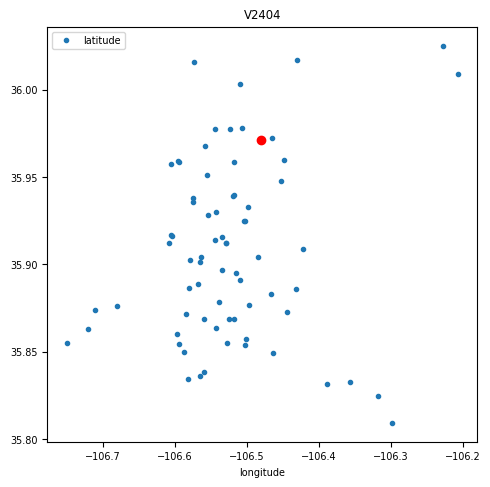

In [5]:
name = Q.widget.kwargs['name']
component = Q.widget.kwargs['component']
tf = mc.get_tf(name)

fig, ax = plt.subplots(1,1, figsize=(5,5))
mc.dataframe.plot(x='longitude', y='latitude', marker='.', linestyle='None', ax=ax)
ax.plot(tf.longitude, tf.latitude, 'ro')
ax.set_title(name)

24:06:28T10:32:55 | INFO | line:1109 |mtpy.core.mt | to_simpeg_1d | Using default errors for impedance


C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy-v2\mtpy\modeling\simpeg\recipes\inversion_1d.py:194: RuntimeWarning: divide by zero encountered in log10
  np.where(np.log10(abs(np.diff(sub_df.res))) > max_diff_res)[0] + 1



                        SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
                        ***Done using same Solver, and solver_opts as the Simulation1DRecursive problem***
                        
model has any nan: 0
============================ Inexact Gauss Newton ============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  7.23e+02  1.63e+03  0.00e+00  1.63e+03    1.02e+03      0              
   1  3.62e+02  2.05e+02  1.47e-04  2.05e+02    1.65e+02      0              


C:\Users\jpeacock\Anaconda3\envs\py39\lib\site-packages\SimPEG\electromagnetics\natural_source\simulation_1d.py:129: RuntimeWarning: overflow encountered in tanh
  tanhs = np.tanh(alphas[:-1] * thicknesses[:, None])
C:\Users\jpeacock\Anaconda3\envs\py39\lib\site-packages\SimPEG\electromagnetics\natural_source\simulation_1d.py:171: RuntimeWarning: overflow encountered in tanh
  tanhs = np.tanh(alphas[:-1] * thicknesses[:, None])


------------------------- STOP! -------------------------
1 : |fc-fOld| = 0.0000e+00 <= tolF*(1+|f0|) = 1.6342e+02
0 : |xc-x_last| = 6.2437e+00 <= tolX*(1+|x0|) = 3.3887e+00
0 : |proj(x-g)-x|    = 1.6511e+02 <= tolG          = 1.0000e-01
0 : |proj(x-g)-x|    = 1.6511e+02 <= 1e3*eps       = 1.0000e-02
0 : maxIter   =      40    <= iter          =      2
------------------------- DONE! -------------------------


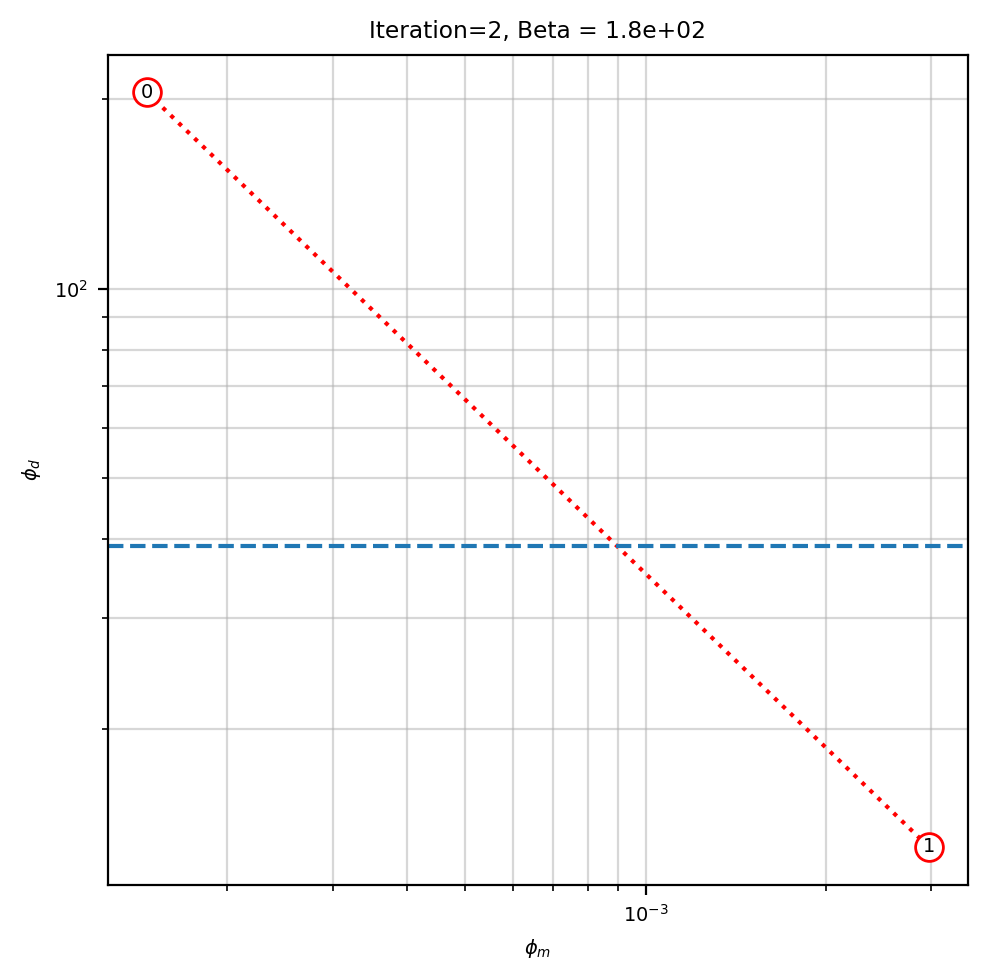

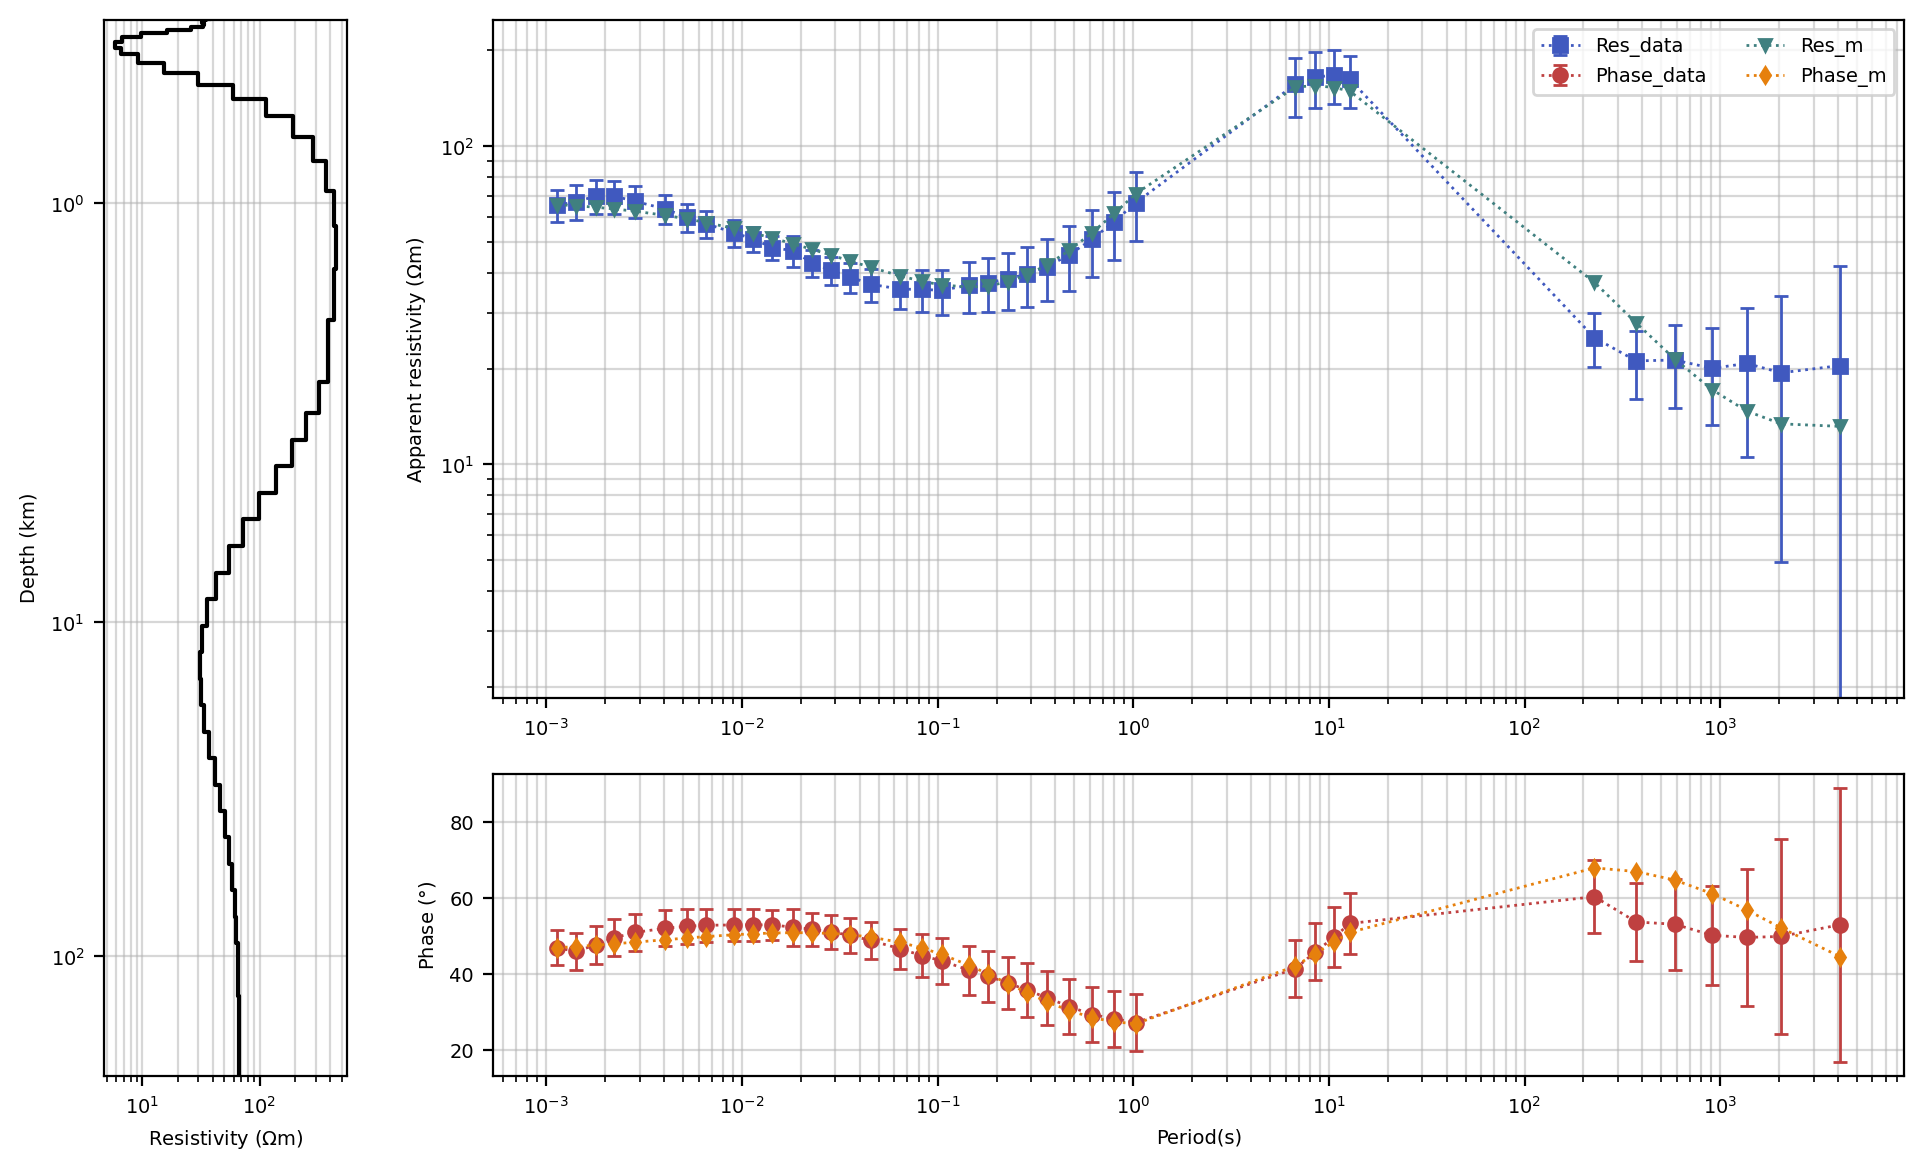

In [6]:
inv_obj = tf.to_simpeg_1d(mode="det")

C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy-v2\mtpy\modeling\simpeg\recipes\inversion_1d.py:194: RuntimeWarning: divide by zero encountered in log10
  np.where(np.log10(abs(np.diff(sub_df.res))) > max_diff_res)[0] + 1
C:\Users\jpeacock\Anaconda3\envs\py39\lib\site-packages\SimPEG\directives\directives.py:337: UserWarning: Without a Linear preconditioner, convergence may be slow. Consider adding `Directives.UpdatePreconditioner` to your directives list
  [directive.validate(self) for directive in self.dList]



                        SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
                        ***Done using same Solver, and solver_opts as the Simulation1DRecursive problem***
                        
model has any nan: 0
============================ Inexact Gauss Newton ============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  3.66e+09  4.63e+09  0.00e+00  4.63e+09    4.49e+09      0              
   1  1.83e+09  3.46e+08  1.45e-06  3.46e+08    6.26e+08      0              
   2  9.14e+08  1.79e+07  1.11e-03  1.89e+07    9.45e+07      0   Skip BFGS  
   3  4.57e+08  5.92e+06  1.65e-03  6.68e+06    1.18e+07      0   Skip BFGS  
   4  2.28e+08  1.55e+06  3.13e-03  2.26e+06    1.44e+07      0   Skip BFGS  
   5  1.14e+08  1.06e+06  3.10e-03  1.41e+06    9.04e+05      0              
   6  5.71e+07  6.18e+05  4.14e

C:\Users\jpeacock\Anaconda3\envs\py39\lib\site-packages\SimPEG\electromagnetics\natural_source\simulation_1d.py:129: RuntimeWarning: overflow encountered in tanh
  tanhs = np.tanh(alphas[:-1] * thicknesses[:, None])


  17  2.79e+04  3.36e+05  1.24e-01  3.39e+05    1.79e+06      3              
  18  1.39e+04  3.31e+05  1.41e-01  3.33e+05    2.51e+06      4   Skip BFGS  


C:\Users\jpeacock\Anaconda3\envs\py39\lib\site-packages\SimPEG\electromagnetics\natural_source\simulation_1d.py:171: RuntimeWarning: overflow encountered in tanh
  tanhs = np.tanh(alphas[:-1] * thicknesses[:, None])


  19  6.97e+03  3.24e+05  1.78e-01  3.25e+05    3.65e+06      1              
  20  3.49e+03  3.20e+05  1.89e-01  3.21e+05    3.81e+06      4              
  21  1.74e+03  3.09e+05  2.98e-01  3.10e+05    1.67e+06      1   Skip BFGS  
  22  8.71e+02  3.07e+05  3.44e-01  3.07e+05    2.13e+06      4   Skip BFGS  
  23  4.36e+02  2.88e+05  2.77e-01  2.88e+05    1.27e+06      0              
  24  2.18e+02  2.87e+05  3.80e-01  2.87e+05    2.02e+06      3              
  25  1.09e+02  2.87e+05  3.56e-01  2.87e+05    2.16e+06      3              
  26  5.45e+01  2.85e+05  3.90e-01  2.85e+05    1.66e+06      0              
  27  2.72e+01  2.85e+05  4.00e-01  2.85e+05    1.97e+06      4              
  28  1.36e+01  2.81e+05  5.01e-01  2.81e+05    1.31e+06      0   Skip BFGS  
  29  6.81e+00  2.80e+05  5.79e-01  2.80e+05    1.80e+06      2   Skip BFGS  
  30  3.40e+00  2.76e+05  5.63e-01  2.76e+05    2.59e+05      0              
  31  1.70e+00  2.75e+05  6.22e-01  2.76e+05    6.24e+05      2 

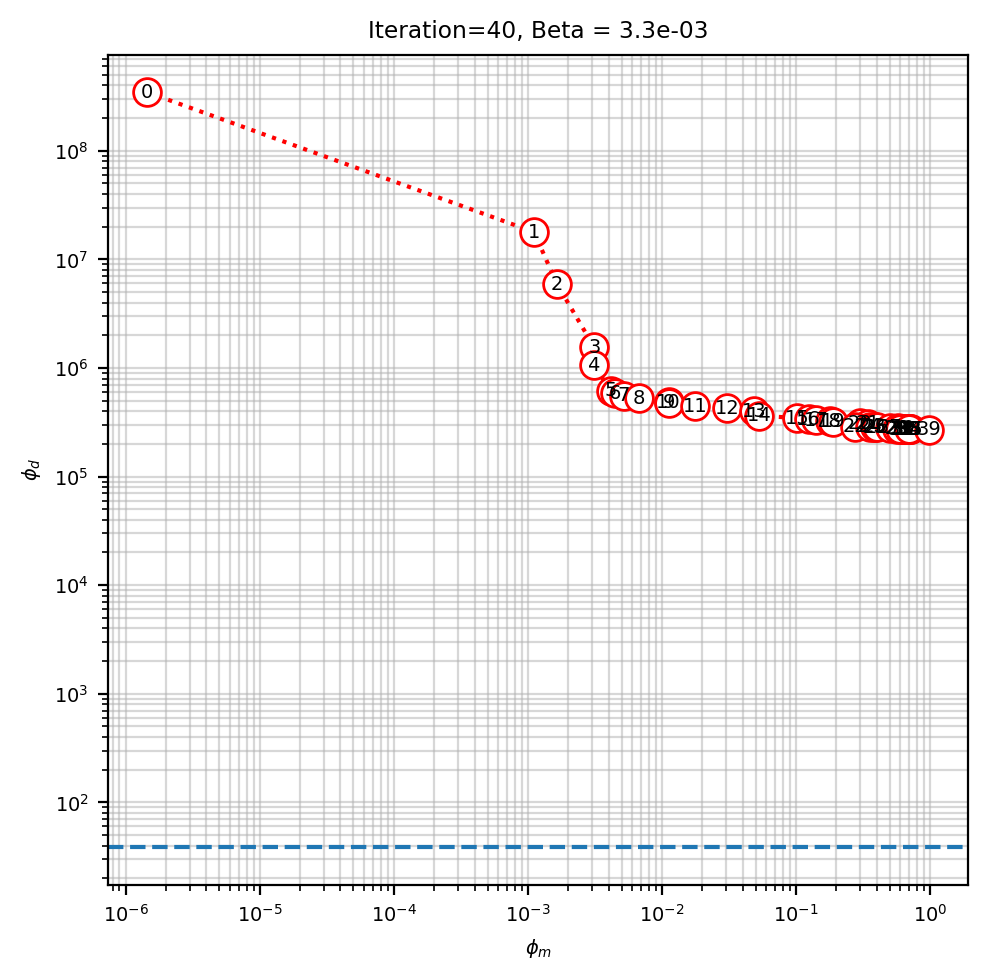

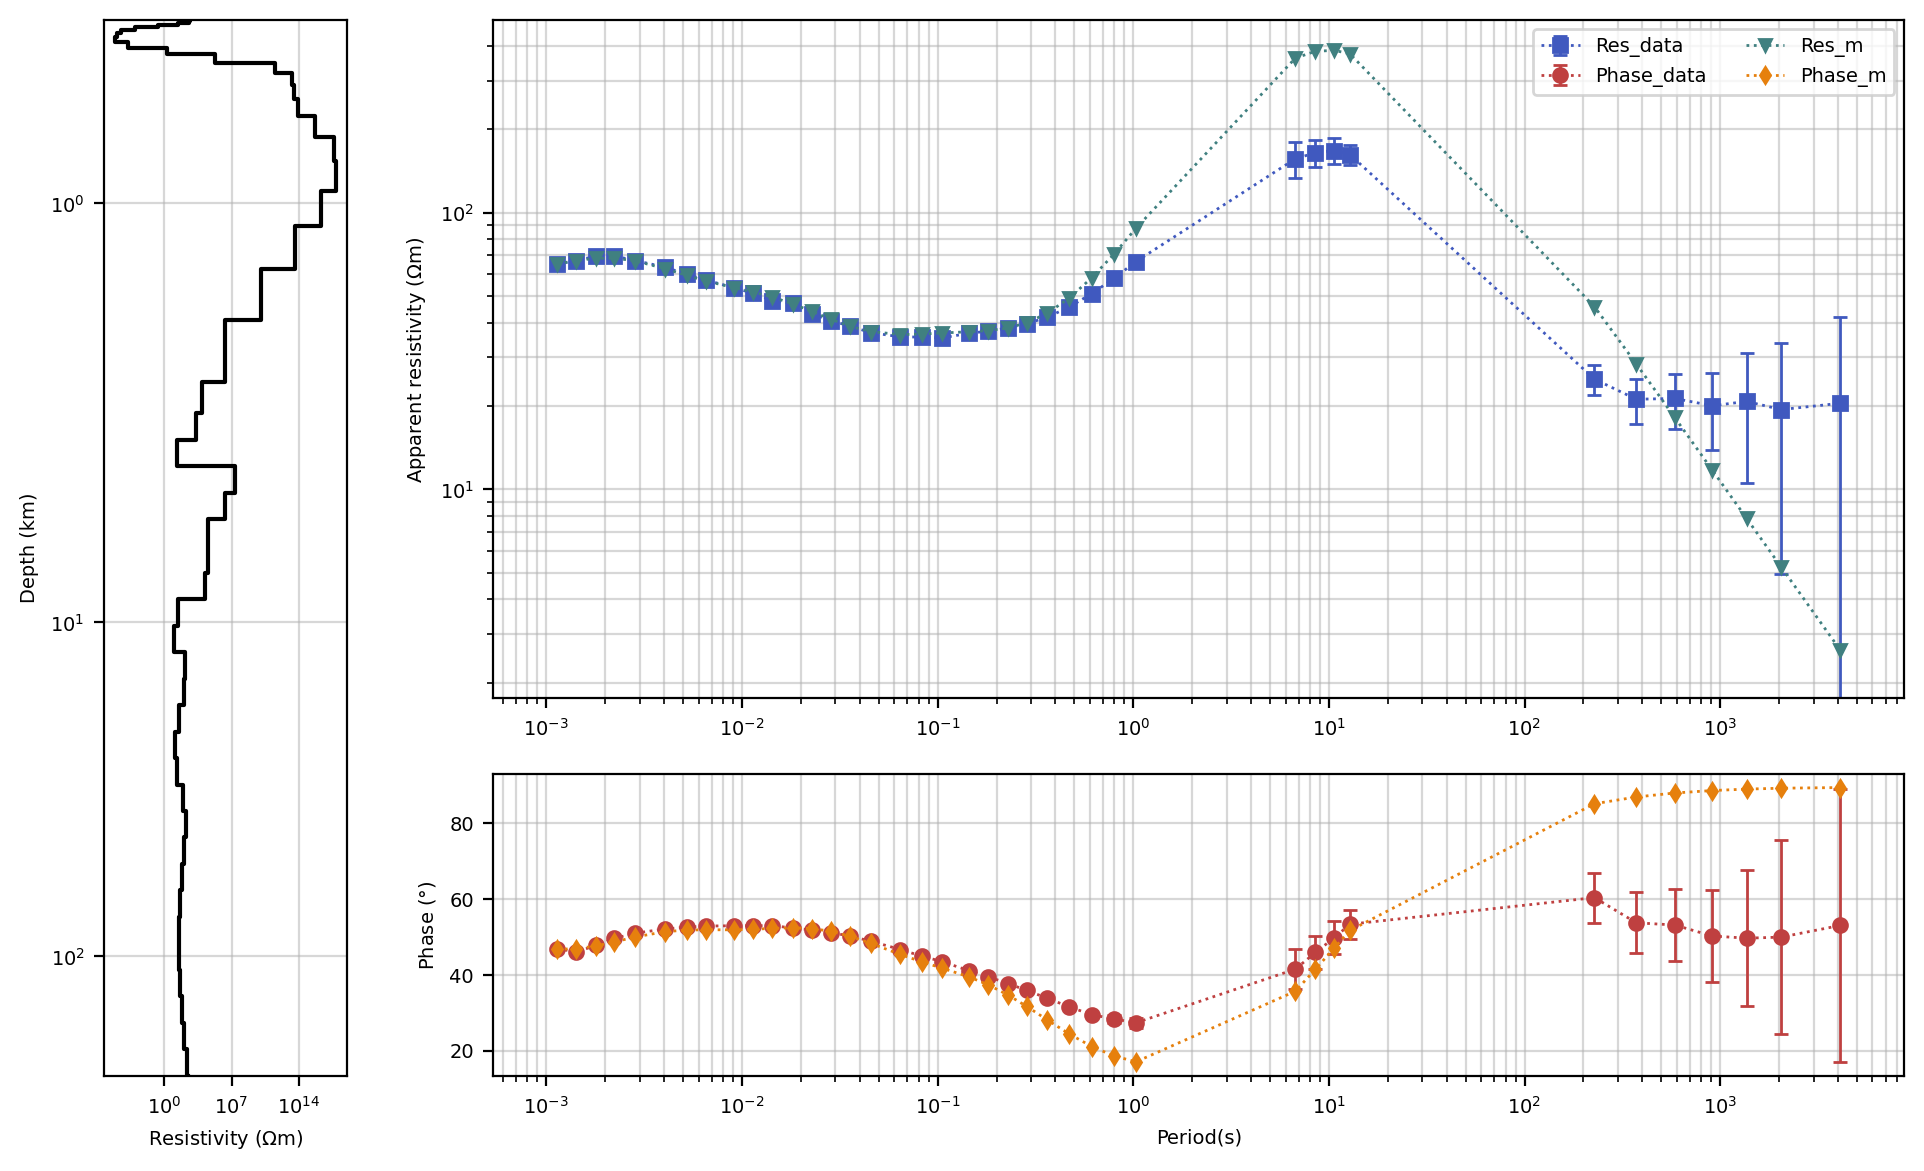

In [7]:
tf.compute_model_z_errors(error_value=3, error_type="data")
inv_obj = tf.to_simpeg_1d(mode="det", **{"p_s": 2, "p_z": 0, "use_irls": True})

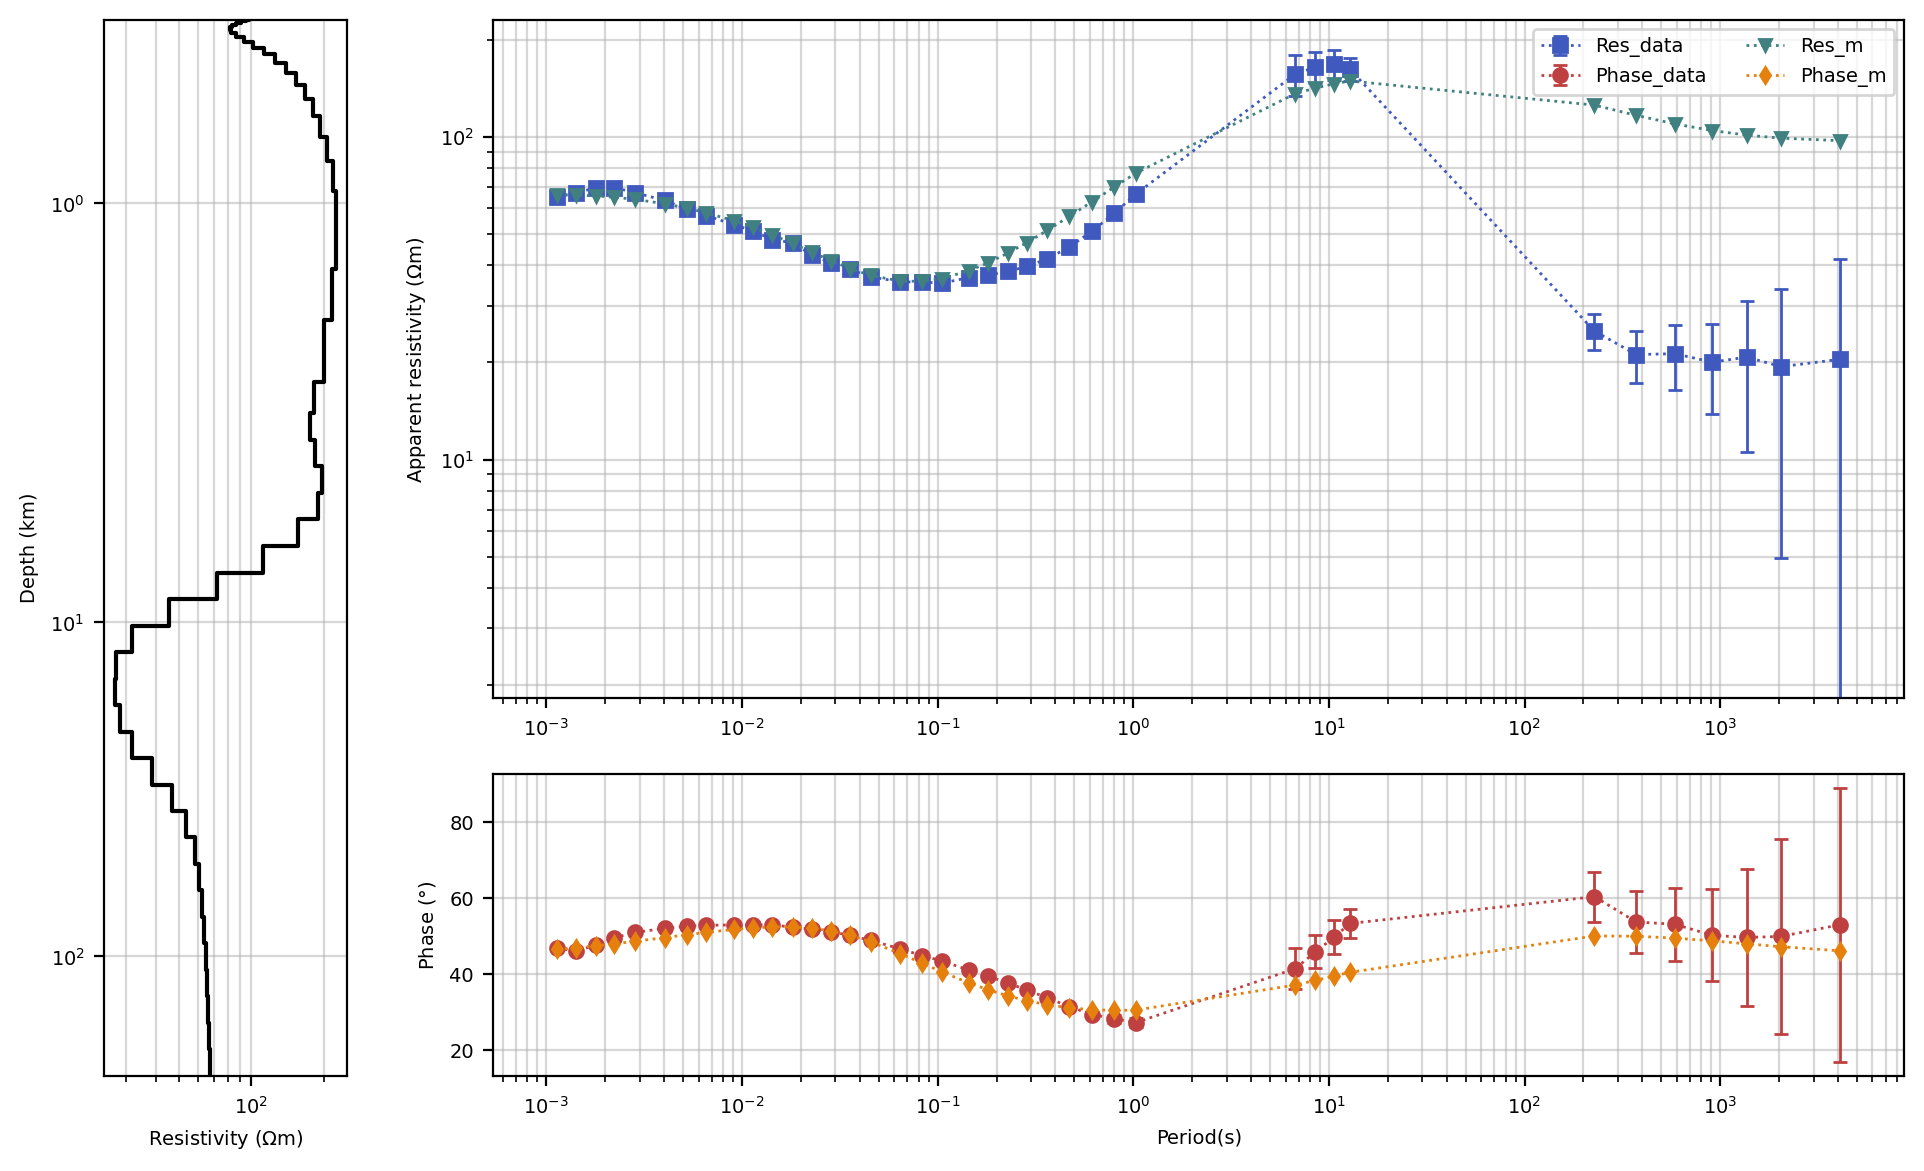

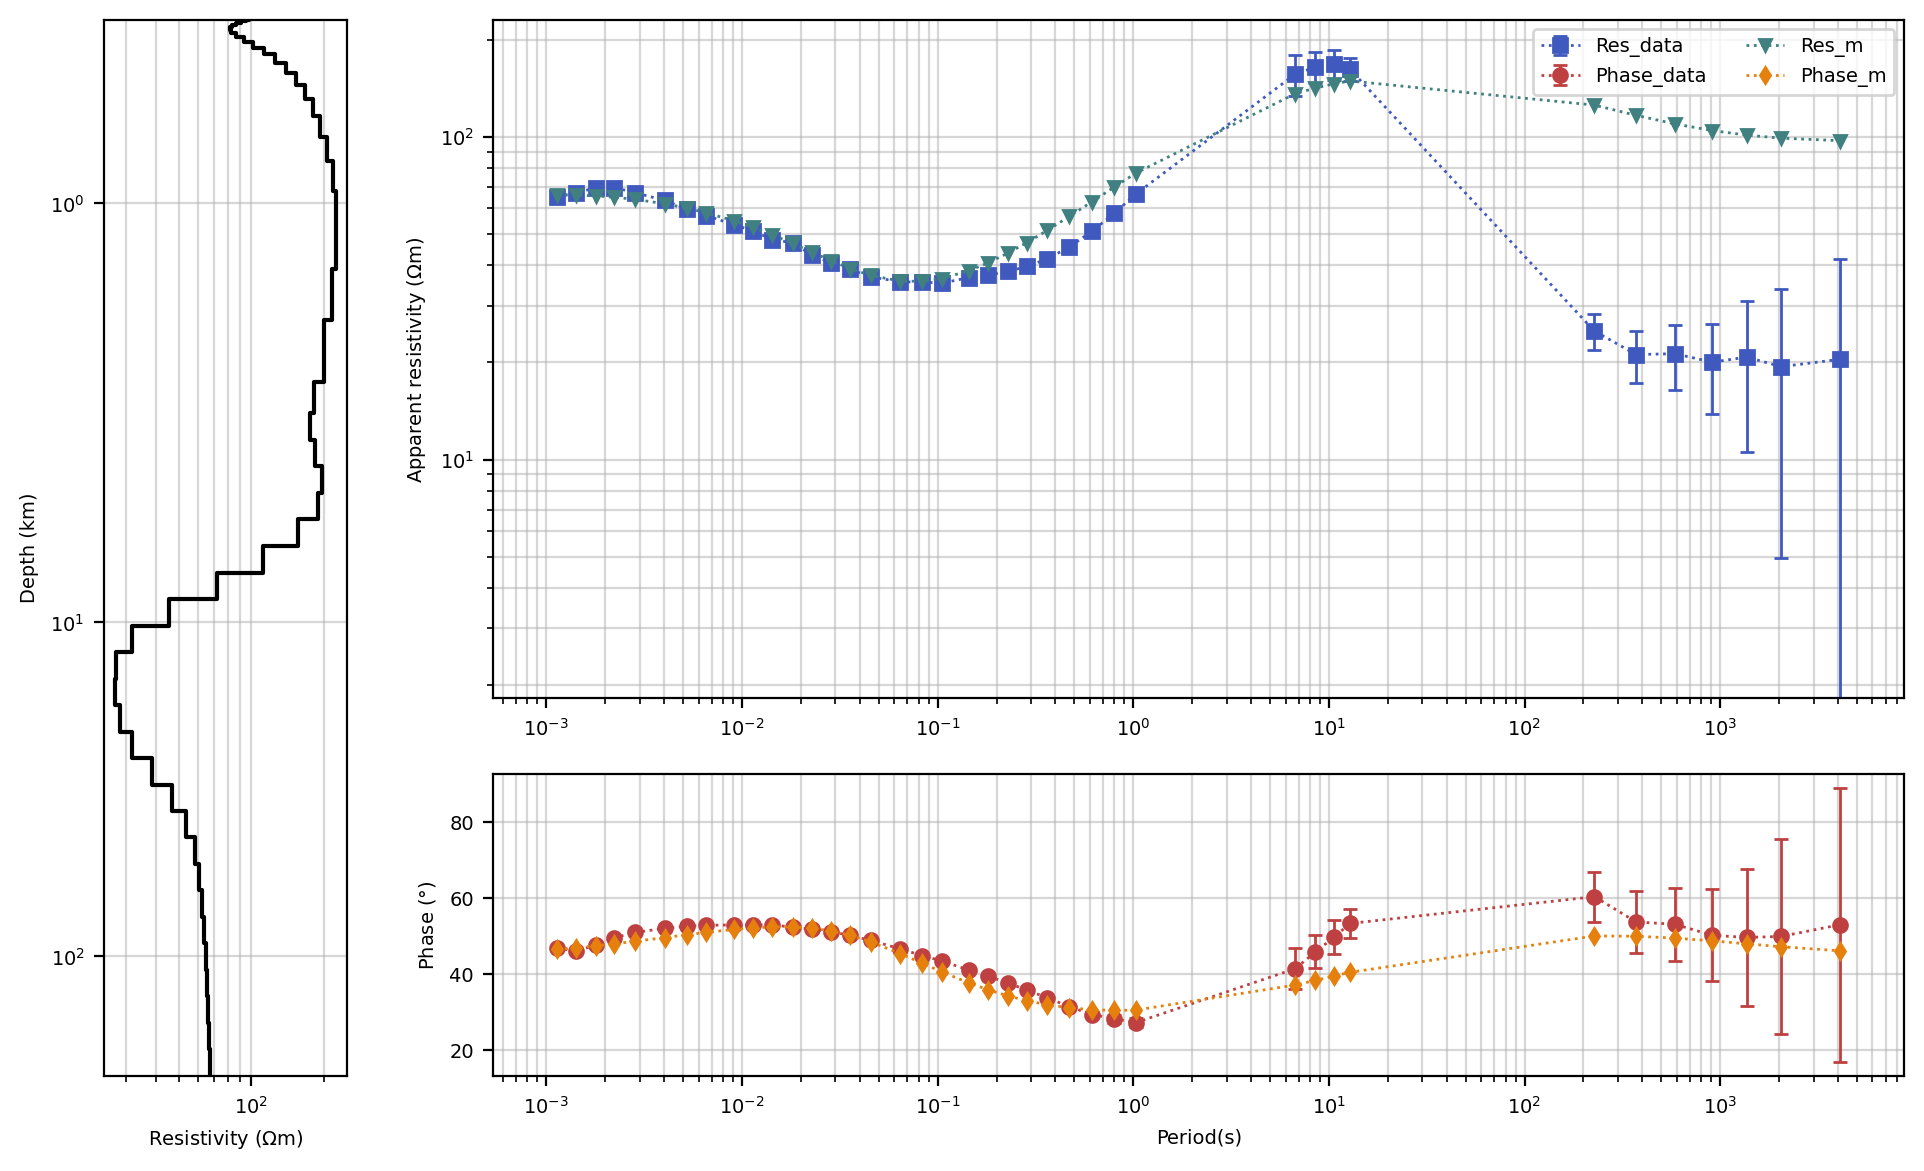

In [8]:
inv_obj.plot_response(7)

C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy-v2\mtpy\modeling\simpeg\recipes\inversion_1d.py:194: RuntimeWarning: divide by zero encountered in log10
  np.where(np.log10(abs(np.diff(sub_df.res))) > max_diff_res)[0] + 1
C:\Users\jpeacock\Anaconda3\envs\py39\lib\site-packages\SimPEG\directives\directives.py:337: UserWarning: Without a Linear preconditioner, convergence may be slow. Consider adding `Directives.UpdatePreconditioner` to your directives list
  [directive.validate(self) for directive in self.dList]



                        SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
                        ***Done using same Solver, and solver_opts as the Simulation1DRecursive problem***
                        
model has any nan: 0
============================ Inexact Gauss Newton ============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  3.80e+09  4.63e+09  0.00e+00  4.63e+09    4.49e+09      0              
   1  1.90e+09  3.46e+08  1.45e-06  3.46e+08    6.26e+08      0              
   2  9.49e+08  1.79e+07  1.11e-03  1.89e+07    9.45e+07      0   Skip BFGS  
   3  4.74e+08  5.92e+06  1.65e-03  6.70e+06    1.18e+07      0   Skip BFGS  
   4  2.37e+08  1.55e+06  3.09e-03  2.28e+06    1.43e+07      0   Skip BFGS  
   5  1.19e+08  1.07e+06  3.07e-03  1.44e+06    9.16e+05      0              
   6  5.93e+07  6.21e+05  4.12e

C:\Users\jpeacock\Anaconda3\envs\py39\lib\site-packages\SimPEG\electromagnetics\natural_source\simulation_1d.py:129: RuntimeWarning: overflow encountered in tanh
  tanhs = np.tanh(alphas[:-1] * thicknesses[:, None])


  13  4.63e+05  4.24e+05  2.91e-02  4.38e+05    2.83e+06      2   Skip BFGS  
  14  2.32e+05  4.10e+05  3.62e-02  4.19e+05    3.28e+06      3   Skip BFGS  
  15  1.16e+05  4.00e+05  6.45e-02  4.08e+05    1.52e+06      2   Skip BFGS  
  16  5.79e+04  3.93e+05  1.12e-01  4.00e+05    1.80e+06      2              
  17  2.90e+04  3.40e+05  2.24e-01  3.47e+05    5.21e+06      0   Skip BFGS  
  18  1.45e+04  2.96e+05  2.23e-01  2.99e+05    3.97e+05      0              
  19  7.24e+03  2.91e+05  2.69e-01  2.93e+05    1.69e+06      3              
  20  3.62e+03  2.86e+05  2.80e-01  2.87e+05    1.22e+05      0              
  21  1.81e+03  2.82e+05  3.38e-01  2.83e+05    1.62e+06      3   Skip BFGS  


C:\Users\jpeacock\Anaconda3\envs\py39\lib\site-packages\SimPEG\electromagnetics\natural_source\simulation_1d.py:171: RuntimeWarning: overflow encountered in tanh
  tanhs = np.tanh(alphas[:-1] * thicknesses[:, None])


  22  9.05e+02  2.78e+05  4.29e-01  2.79e+05    1.66e+06      2   Skip BFGS  
  23  4.53e+02  2.78e+05  5.13e-01  2.78e+05    1.74e+06      3   Skip BFGS  
  24  2.26e+02  2.70e+05  5.01e-01  2.70e+05    1.06e+05      0              
  25  1.13e+02  2.69e+05  5.83e-01  2.69e+05    1.55e+06      3              
  26  5.66e+01  2.67e+05  5.97e-01  2.67e+05    1.56e+05      0              
  27  2.83e+01  2.67e+05  6.16e-01  2.67e+05    4.16e+05      6   Skip BFGS  
  28  1.41e+01  2.65e+05  7.25e-01  2.65e+05    1.10e+06      3   Skip BFGS  
  29  7.07e+00  2.65e+05  8.31e-01  2.65e+05    1.48e+06      3   Skip BFGS  
  30  3.54e+00  2.63e+05  7.98e-01  2.63e+05    2.25e+05      0              
  31  1.77e+00  2.63e+05  8.48e-01  2.63e+05    5.58e+05      5              
  32  8.84e-01  2.62e+05  8.85e-01  2.62e+05    7.24e+05      5   Skip BFGS  
  33  4.42e-01  2.62e+05  8.89e-01  2.62e+05    7.45e+05      9              
  34  2.21e-01  2.62e+05  9.16e-01  2.62e+05    7.44e+05      5 

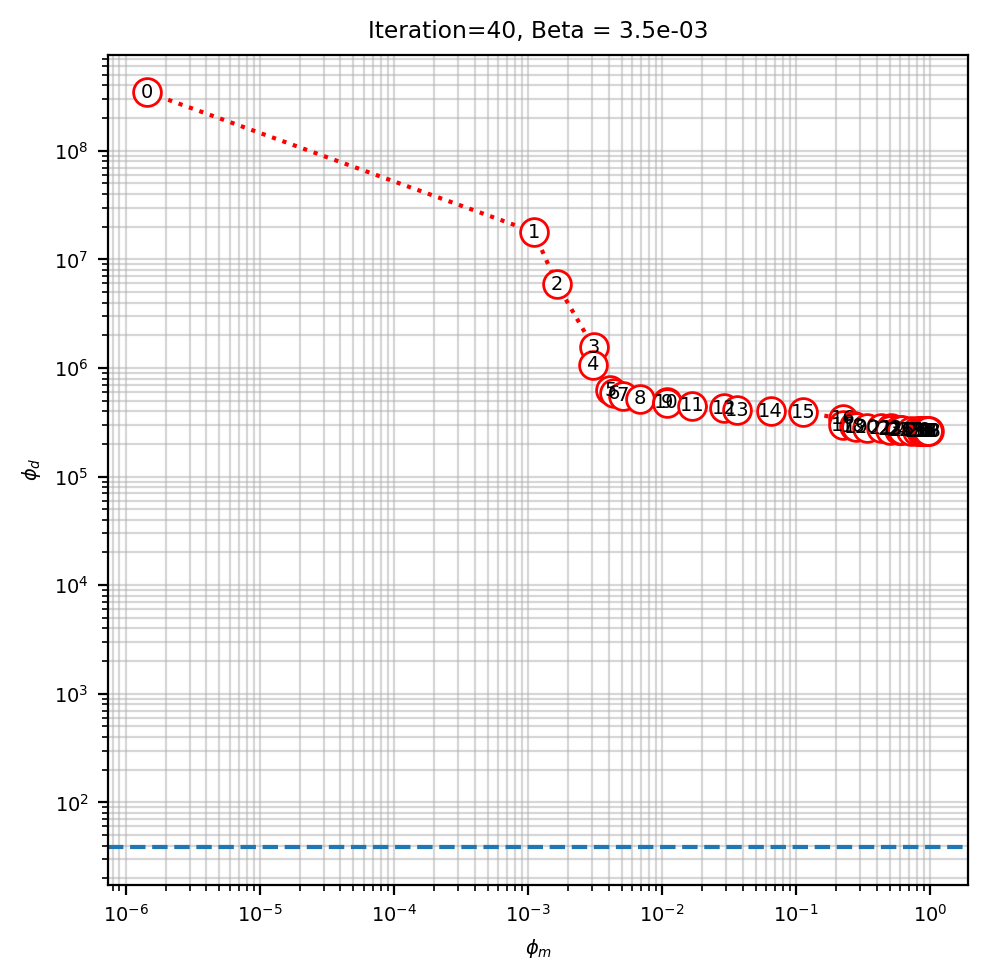

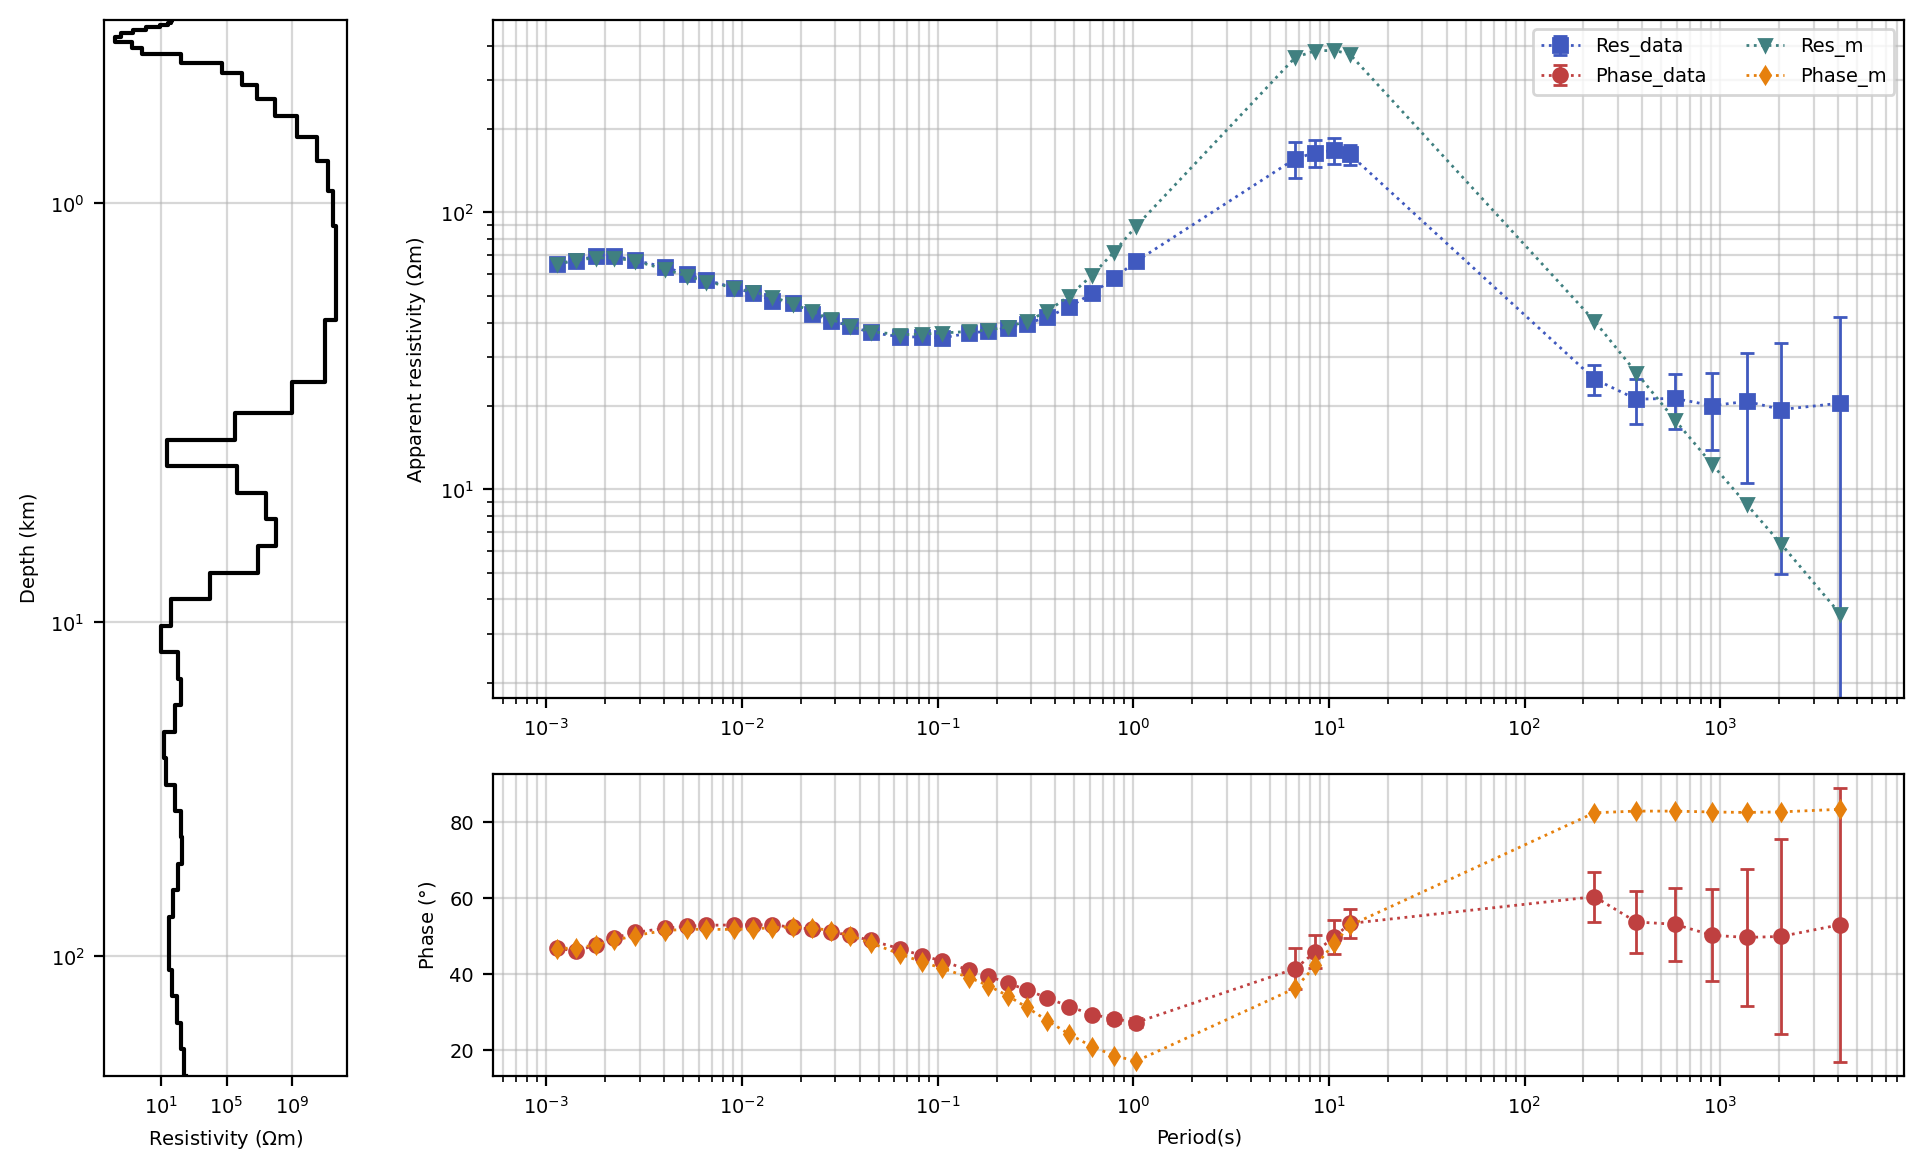

In [9]:
inv_obj = tf.to_simpeg_1d(mode="det", **{"p_s": 0, "p_z": 0, "use_irls": True})

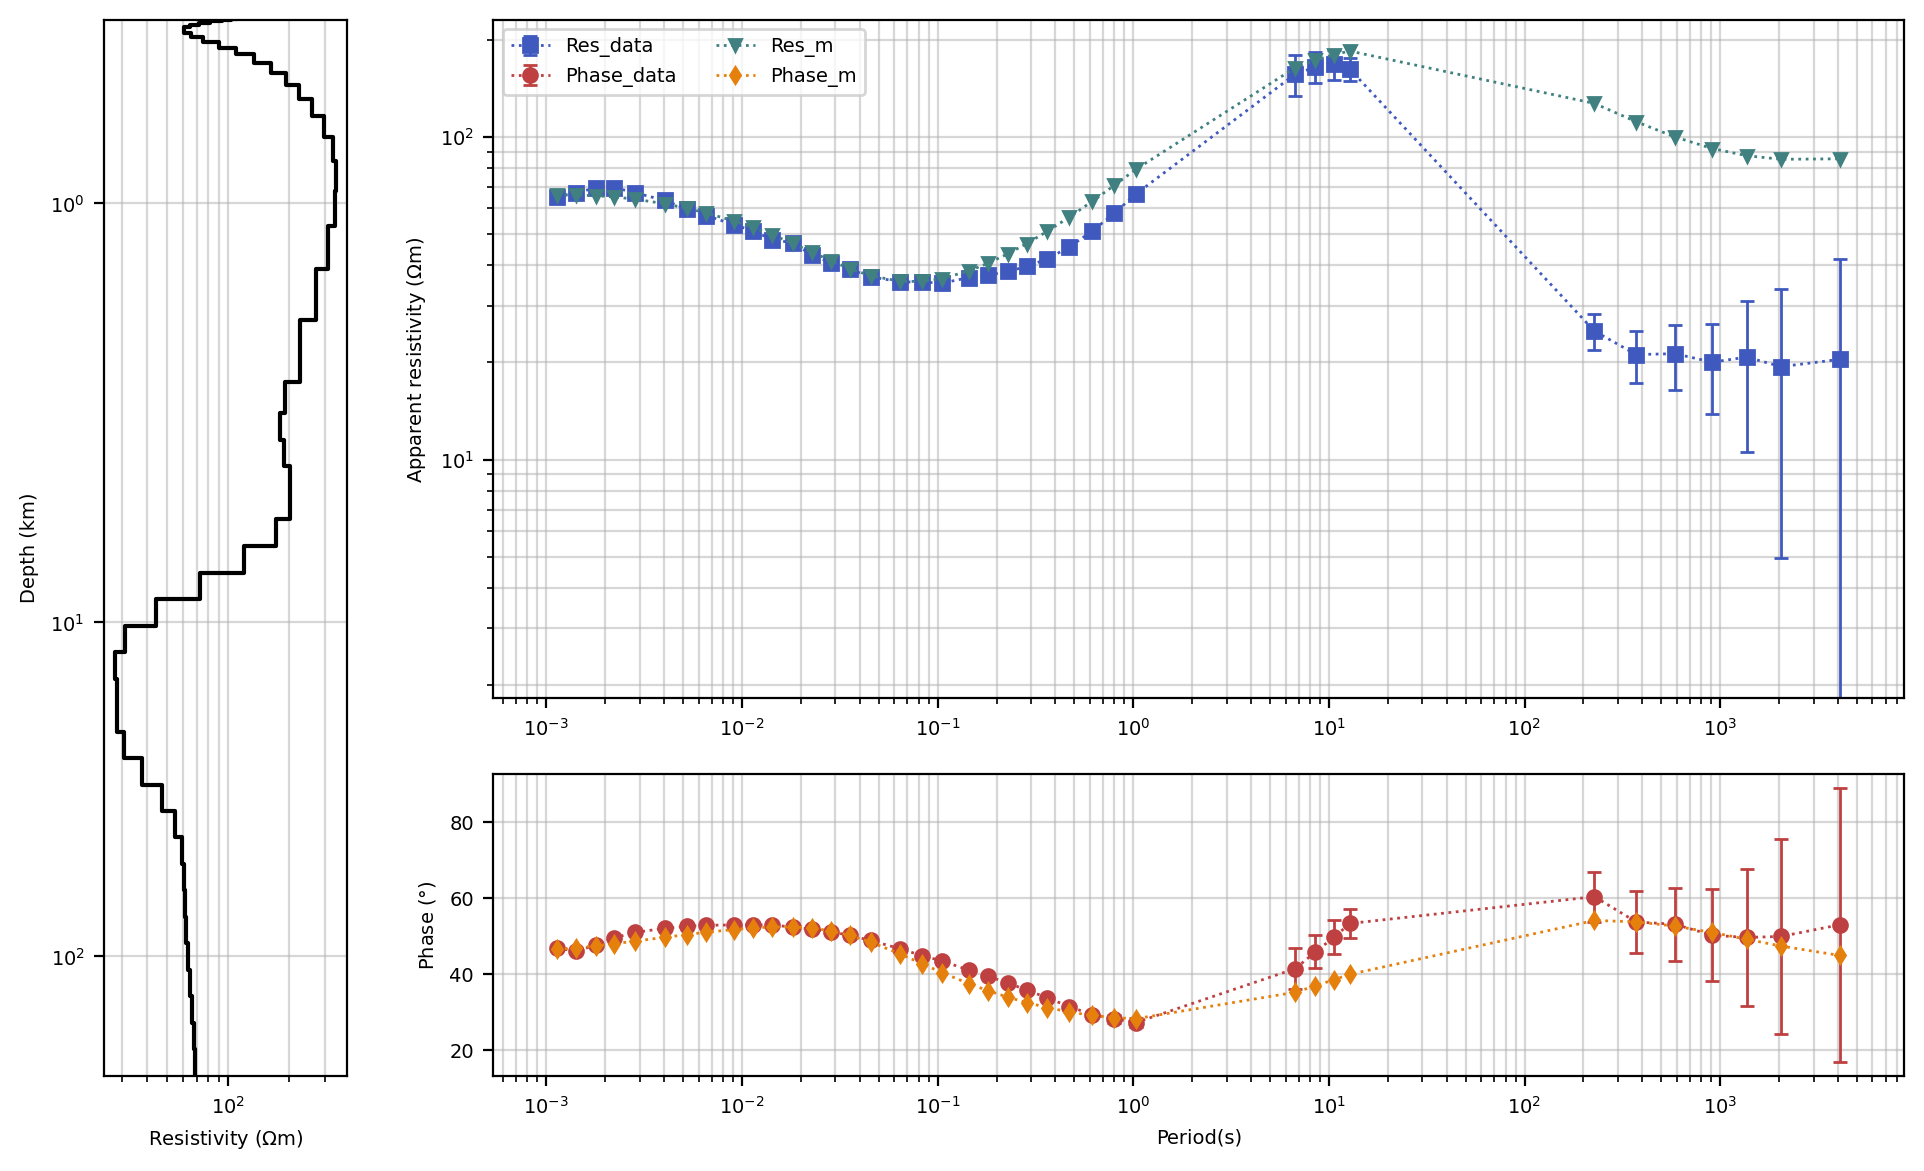

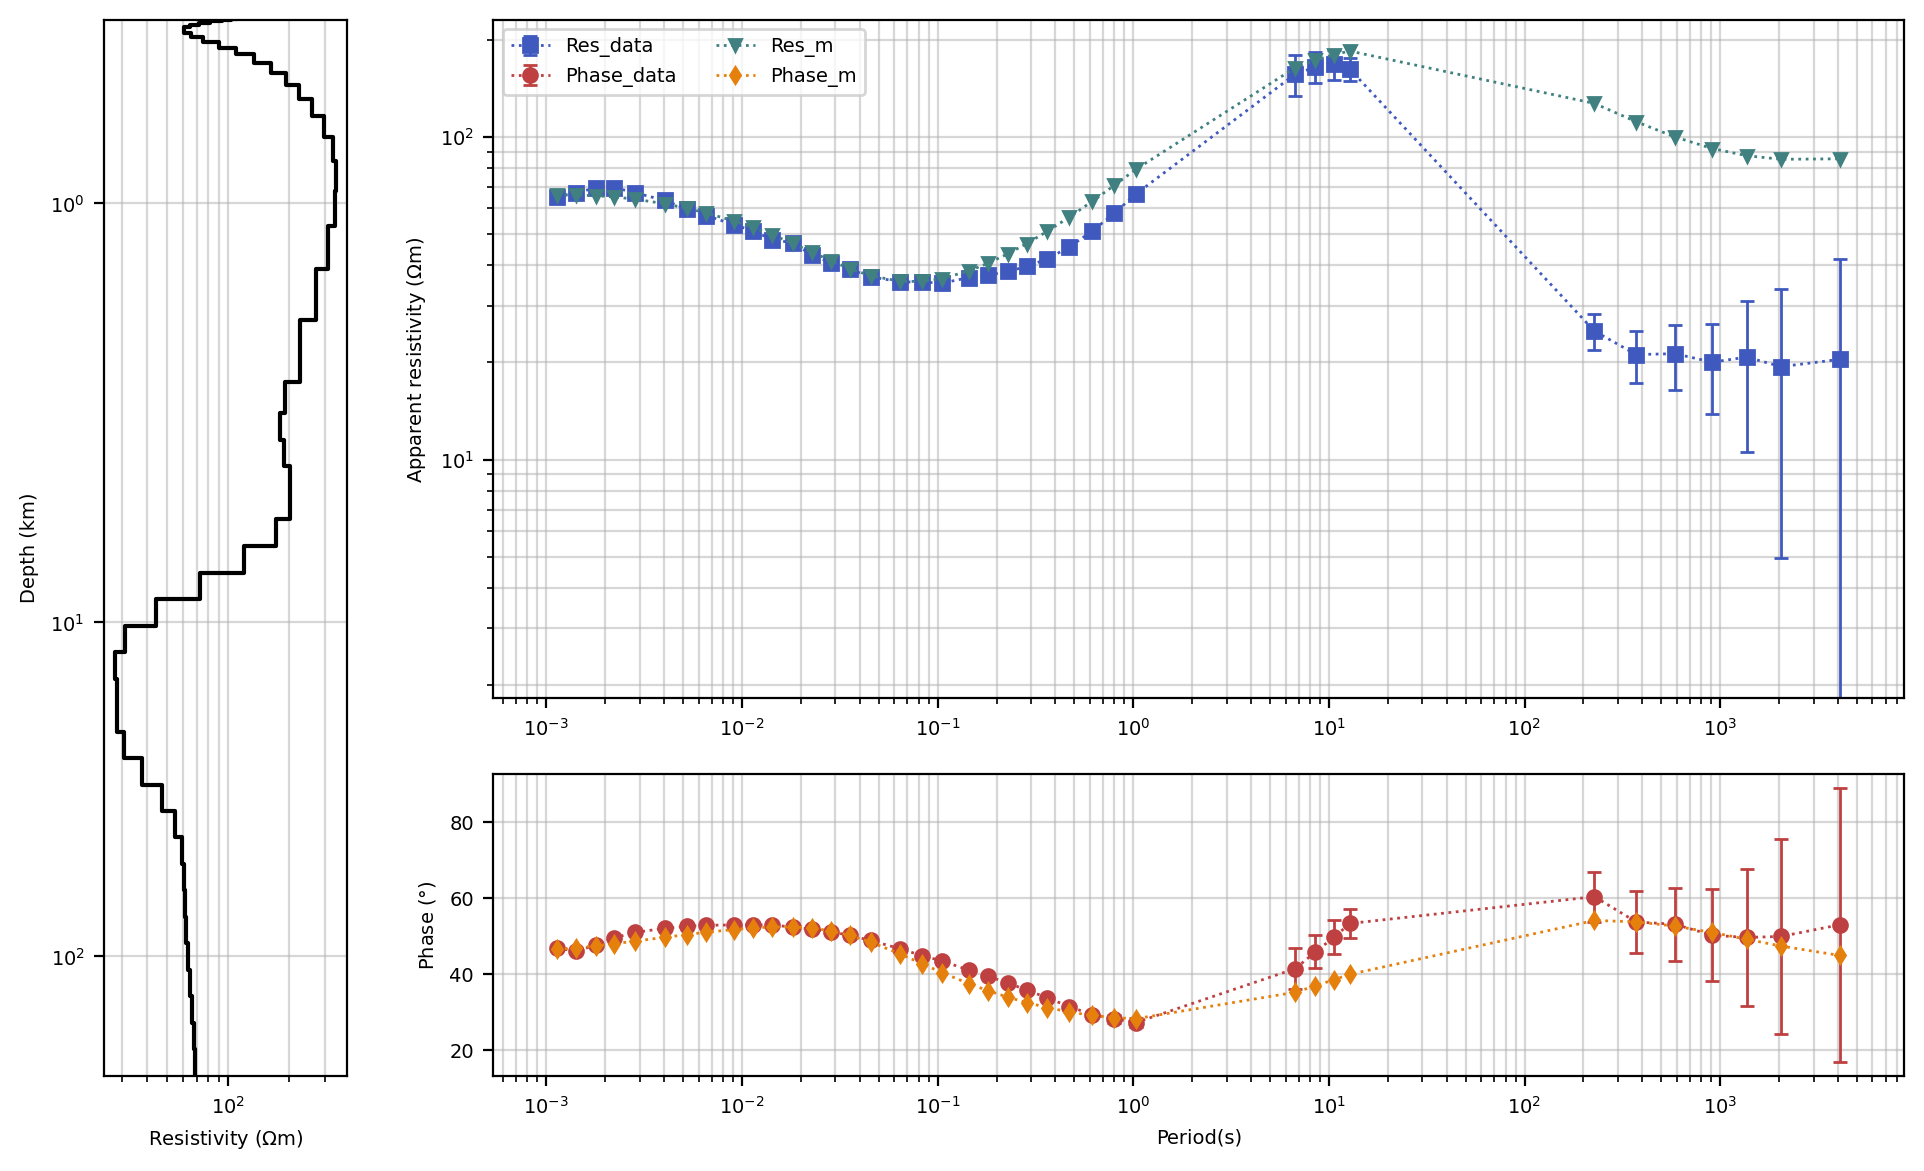

In [10]:
inv_obj.plot_response(8)

In [11]:
mc.close_collection()

24:06:28T10:38:07 | INFO | line:759 |mth5.mth5 | close_mth5 | Flushing and closing c:\Users\jpeacock\OneDrive - DOI\SAGE\2024\EDI_Files\SAGE_tf_all.h5
